In [44]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob
import pickle
import textwrap

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own data wrappers
from imp import reload
import measureclass as mc; reload(mc);
import coronadataclass as cdc; reload(cdc);
import crossvalidationclass as cvc; reload(cvc);

np.seterr(divide = 'ignore');


In [53]:
crossval_long = cvc.CrossValidation(ExternalObservationFile = 'COVID19_data_PAPER_VERSION.csv', resolve_US_states = True, FinalDateFromDB = True, FinalDateExtendWithShiftdays = True)

In [45]:
crossval_long = pickle.load(open('pickle/cv_rt_longrun_cvc10_200601.pickle','rb'))

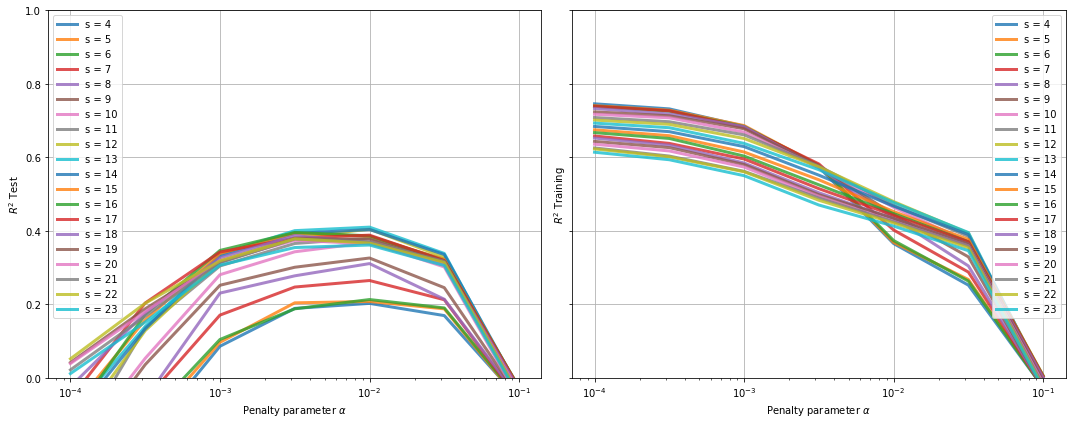

In [51]:
crossval_long.PlotCVresults()

In [50]:
crossval_long.ProcessCVresults().sort_values(by = ['R2 Test Avgd','R2 Test Weighted'], ascending = False).head(10)

,shiftdays,alpha,Loglike Test Avgd,Loglike Test Avgd Std,Loglike Training Avgd,Loglike Training Avgd Std,R2 Test Avgd,R2 Test Avgd Std,R2 Training Avgd,R2 Training Avgd Std,RSS Training Sum,RSS Test Sum,NVar Training Sum,NVar Test Sum,Test Sample Size,Training Sample Size,RSS per datapoint Training,RSS per datapoint Test,R2 Training Weighted,R2 Test Weighted
64,13,0.010000,-181.911995,65.077333,-1583.397249,65.339062,0.409097,0.146694,0.477319,0.014543,102044.146344,12545.794468,195240.236561,21279.272037,60720,546480,0.186730,0.206617,0.477341,0.410422
57,12,0.010000,-179.110933,61.810957,-1557.443936,69.949674,0.404984,0.148739,0.479967,0.015789,100449.433292,12461.218361,193139.589364,20938.892822,59560,536040,0.187392,0.209221,0.479913,0.404877
71,14,0.010000,-187.434649,57.604586,-1627.766767,59.225261,0.395546,0.150059,0.467400,0.013656,105040.891987,12803.863038,197249.433434,21480.404147,61880,556920,0.188610,0.206914,0.467472,0.403928
68,13,0.003162,-183.853910,59.209298,-1327.714828,57.536660,0.394035,0.165317,0.566540,0.011812,84615.635414,12682.615523,195227.586133,21168.266476,60720,546480,0.154838,0.208870,0.566580,0.400867
89,16,0.003162,-192.996226,57.161999,-1493.981190,60.398701,0.388595,0.150571,0.525437,0.014177,95233.924785,13198.420554,200702.814895,21850.740279,64100,576900,0.165079,0.205904,0.525498,0.395974
75,14,0.003162,-188.136700,63.588518,-1387.865369,60.095250,0.385919,0.168405,0.551700,0.011287,88416.230989,13027.121992,197248.611984,21469.013415,61880,556920,0.158759,0.210522,0.551752,0.393213
61,12,0.003162,-186.184878,64.670508,-1289.632289,56.891499,0.383484,0.171583,0.574313,0.012467,82213.100439,12972.098659,193144.411300,20982.146163,59560,536040,0.153371,0.217799,0.574344,0.381755
82,15,0.003162,-192.627939,60.065206,-1440.004463,56.447647,0.381711,0.168162,0.539115,0.012852,91737.893396,13166.510424,199096.235771,21729.575048,63000,567000,0.161795,0.208992,0.539228,0.394074
92,17,0.010000,-197.869375,59.220712,-1742.511980,61.293212,0.381310,0.134634,0.442443,0.012462,112763.547472,13513.124464,202263.505997,22101.448463,65200,586800,0.192167,0.207257,0.442492,0.388586
103,18,0.003162,-200.344751,62.201047,-1584.250564,66.285235,0.380765,0.153328,0.503909,0.015859,101114.941881,13610.293444,203848.599954,22209.673035,66300,596700,0.169457,0.205283,0.503970,0.387191


In [40]:
crossval_long.ProcessCVresults().to_csv('cv_long.csv',index = False, header = False, sep = ' ')

In [46]:
crossval_long.ComputeFinalModels(modelparameters=[(13,1e-2)])

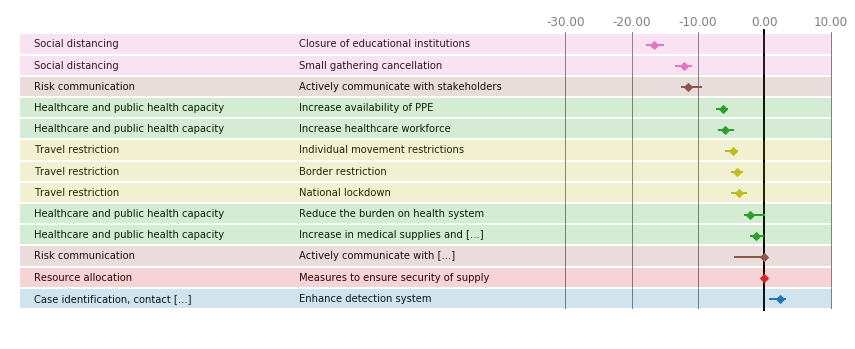

In [49]:
crossval_long.PlotMeasureListSorted(drop_zeros=True, figsize = (15,6), rescale = True, entryheight=.7)

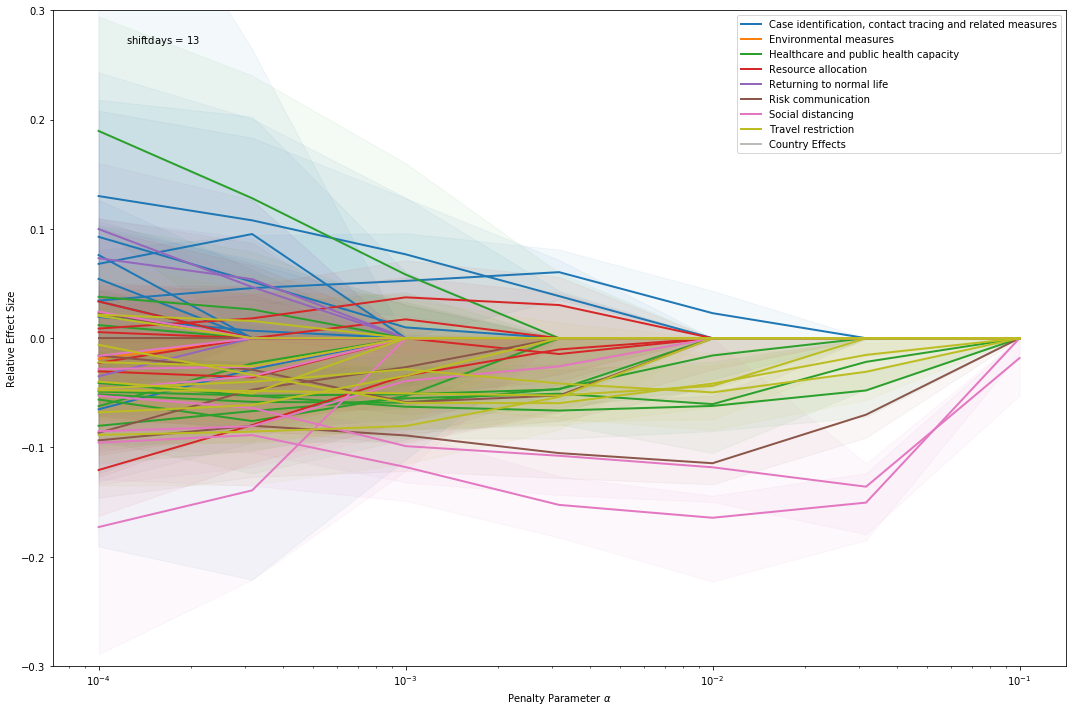

In [24]:
crossval_long.PlotCVAlphaSweep(shiftdays = [13], ylim = (-.3,.3))

In [52]:
crossval_long.FinalMeasureEffects(additional_columns=['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measure_effects.csv')